In [23]:
# Import necessary libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load the data
df = pd.read_csv('../../data/processed-v2.csv')

In [3]:
# Data Preprocessing
df.drop(columns=["product_id"], inplace=True)  # Drop product_id column
df.columns = df.columns.str.replace(" ", "_")  # Replace spaces in column names with underscores

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer



# Handle missing values
imputer = SimpleImputer(strategy='mean')  # Replace missing values with the mean
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)



In [4]:
# Convert certain columns to integers (if required)
int_columns = ["battery_type", "form_factor", "os_name"]
df[int_columns] = df[int_columns].astype(int)

In [5]:
# Data Summary
print("Data Summary:")
print(df.info())
print(df.describe())

Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646 entries, 0 to 645
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mrp                      646 non-null    int64  
 1   ram                      646 non-null    int64  
 2   inbuilt_storage          646 non-null    int64  
 3   weight                   646 non-null    int64  
 4   battery_power            646 non-null    int64  
 5   battery_type             646 non-null    int32  
 6   form_factor              646 non-null    int32  
 7   length                   646 non-null    float64
 8   width                    646 non-null    float64
 9   height                   646 non-null    float64
 10  os_name                  646 non-null    int32  
 11  os_version               646 non-null    float64
 12  phone_warranty_(months)  646 non-null    int64  
 13  camera_count             646 non-null    int64  
 14  cam_has_AI  

In [6]:
# Remove spaces and special characters from column names
df.columns = df.columns.str.replace(r'[^\w\s]', '').str.replace(' ', '_')

In [7]:
# Rename the column "phone_warranty (months)" to "phone_warranty_months"
df.rename(columns={"phone_warranty (months)": "phone_warranty_months"}, inplace=True)


In [8]:
# Check the column names in the dataset
print(df.columns)


Index(['mrp', 'ram', 'inbuilt_storage', 'weight', 'battery_power',
       'battery_type', 'form_factor', 'length', 'width', 'height', 'os_name',
       'os_version', 'phone_warranty_(months)', 'camera_count', 'cam_has_AI',
       'cam_has_OIS', 'cam_has_Zoom', 'cam_has_HDR', 'cam_has_Macro',
       'cam_has_Portrait', 'main_camera_MP', 'is_success'],
      dtype='object')



Distribution Analysis:


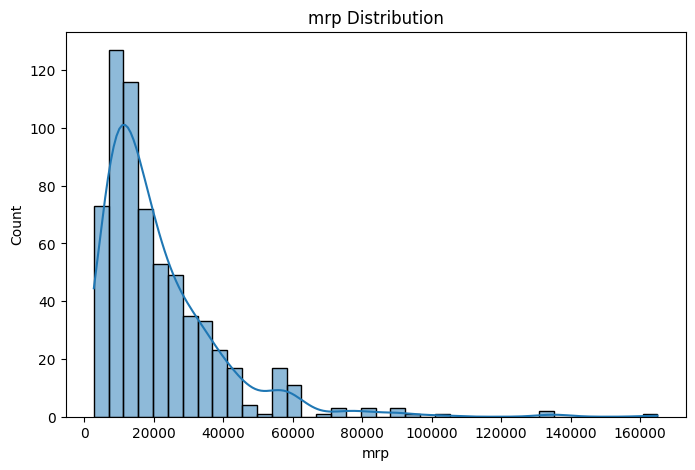

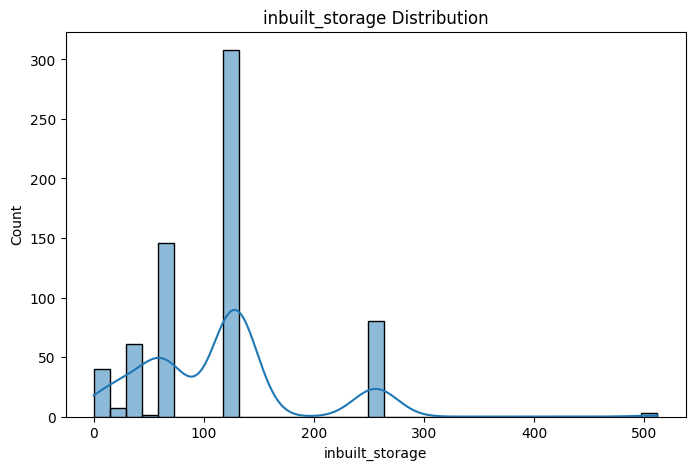

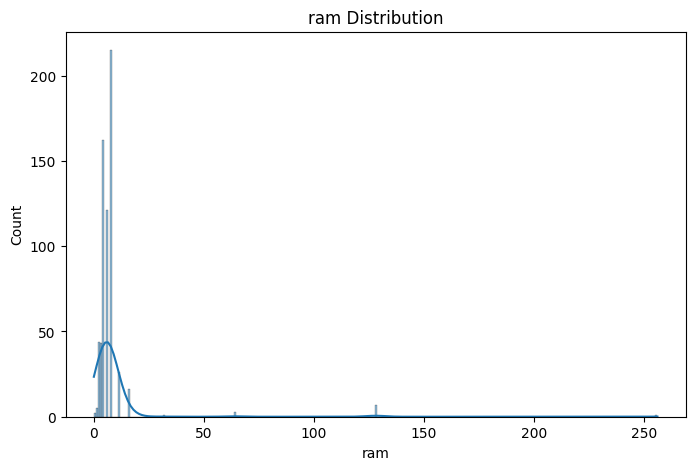

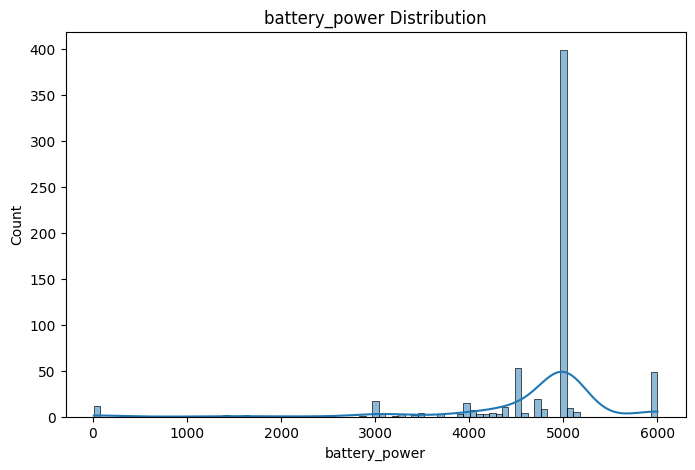

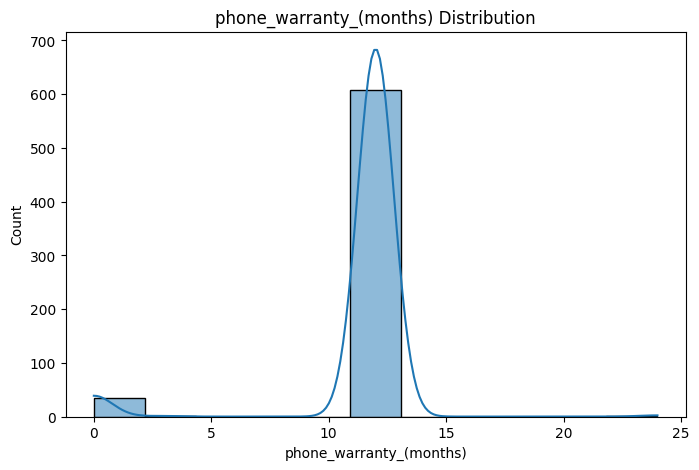

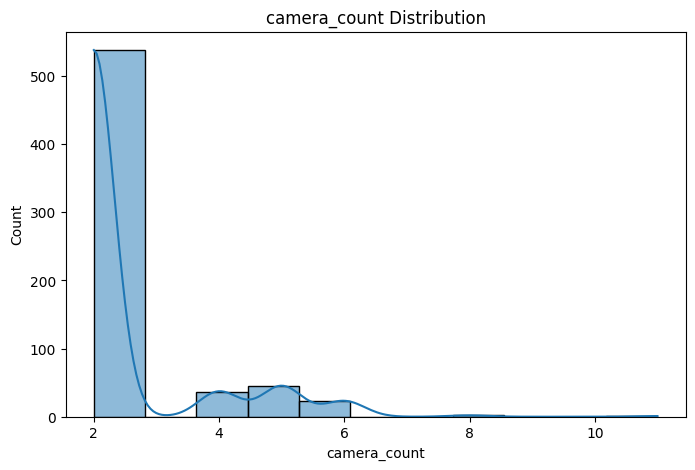

In [22]:
import os

# Set the folder location to save the PNG files
folder_location = "F:/an-001-master/phones/src/plots/distributions"

# Create the folder if it doesn't exist
if not os.path.exists(folder_location):
    os.makedirs(folder_location)

# EDA - Distribution Analysis (revised)
print("\nDistribution Analysis:")
numeric_features = ["mrp", "inbuilt_storage", "ram", "battery_power", "phone_warranty_(months)", "camera_count"]
for feature in numeric_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=df.columns[df.columns.get_loc(feature)], kde=True)
    plt.title(f"{feature} Distribution")

    # Save the plot as a PNG file in the specified folder
    file_path = os.path.join(folder_location, f"{feature}_distribution.png")
    plt.savefig(file_path)

    # Show the plot
    plt.show()


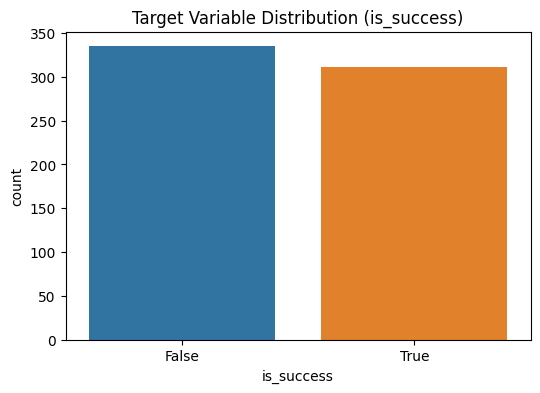

In [24]:


# Set the folder location to save the PNG files
folder_location = "F:/an-001-master/phones/src/plots/distributions"

# Create the folder if it doesn't exist
if not os.path.exists(folder_location):
    os.makedirs(folder_location)

# Analyze the distribution of the target variable "is_success"
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="is_success")
plt.xticks([0, 1], ["False", "True"])
plt.title("Target Variable Distribution (is_success)")

# Save the plot as a PNG file in the specified folder
file_path = os.path.join(folder_location, "is_success_distribution.png")
plt.savefig(file_path)

# Show the plot
plt.show()



Feature Correlation:


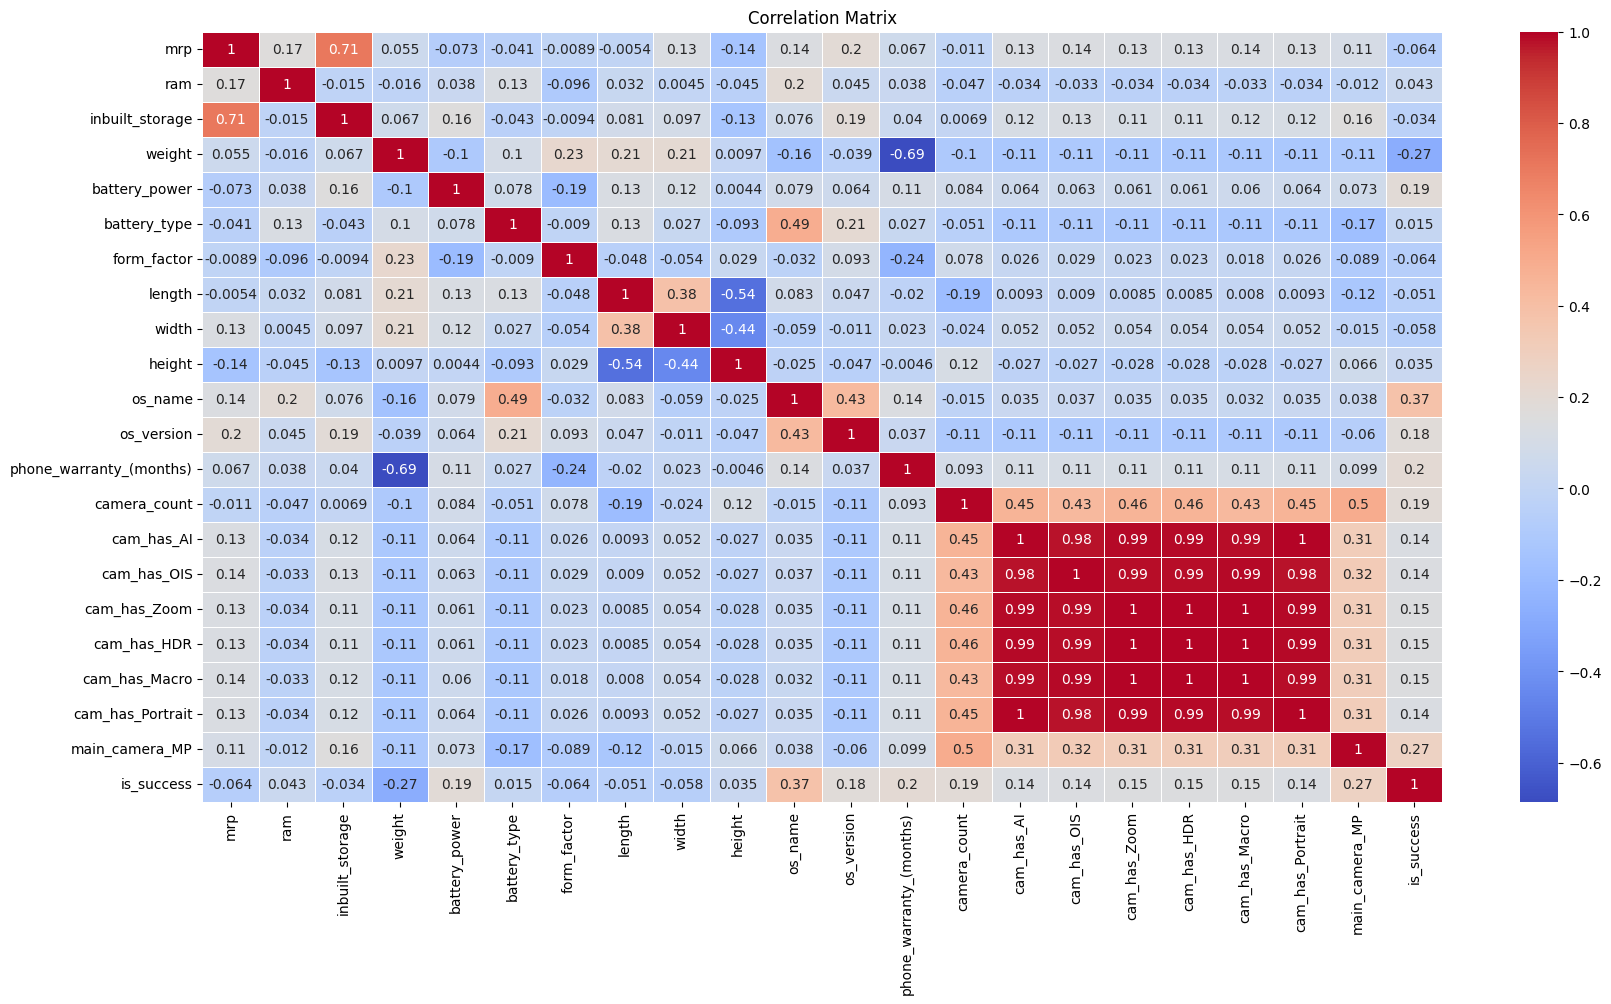

In [25]:


# Set the folder location to save the PNG files
folder_location = "F:/an-001-master/phones/src/plots/correlation"

# Create the folder if it doesn't exist
if not os.path.exists(folder_location):
    os.makedirs(folder_location)

# Feature Correlation
print("\nFeature Correlation:")
correlation_matrix = df.corr()
plt.figure(figsize=(20, 10))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')

# Save the plot as a PNG file in the specified folder
file_path = os.path.join(folder_location, "feature_correlation_heatmap.png")
plt.savefig(file_path)

# Show the plot
plt.show()



Categorical Feature Analysis:


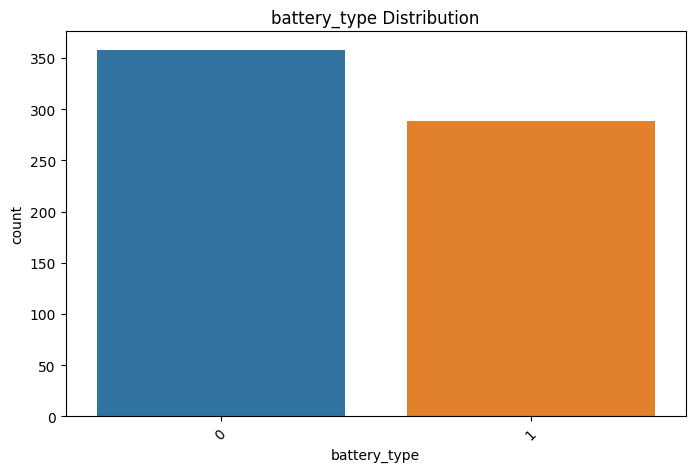

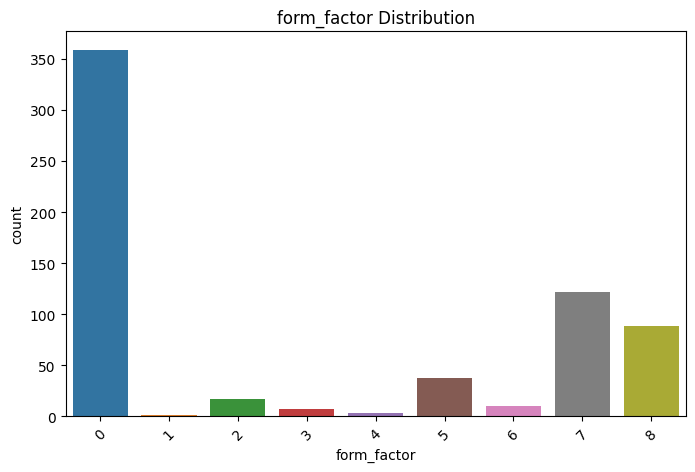

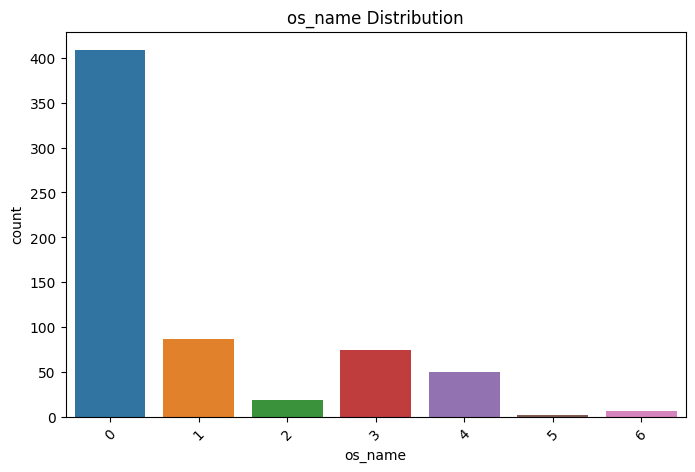

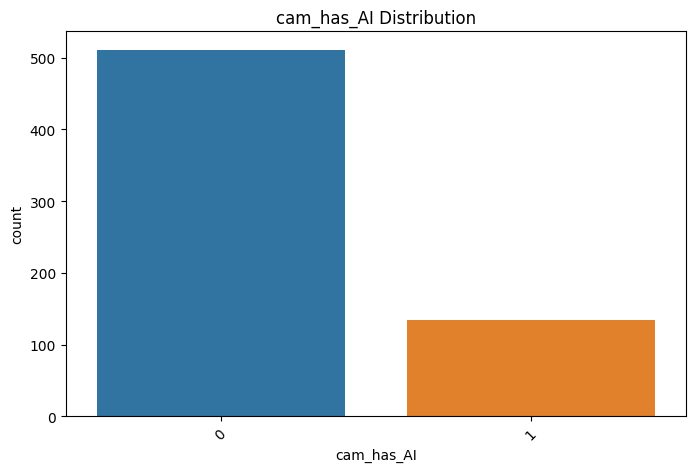

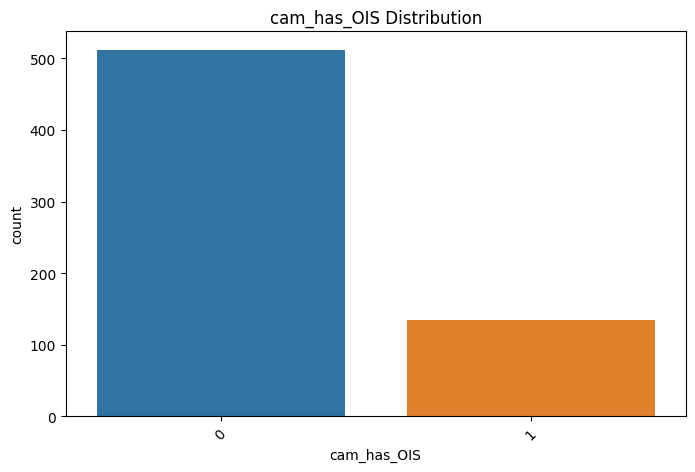

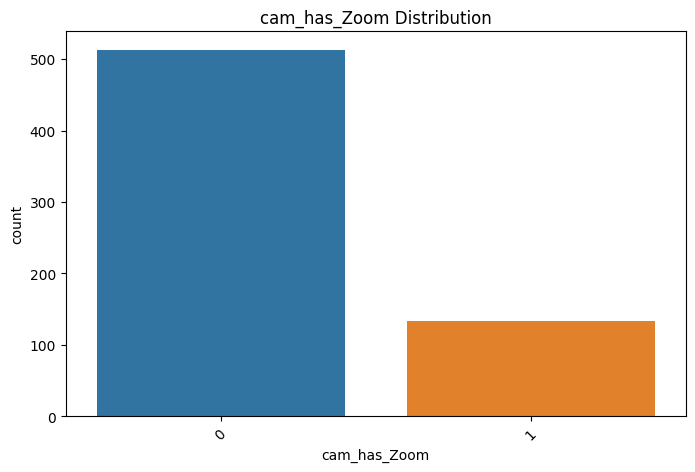

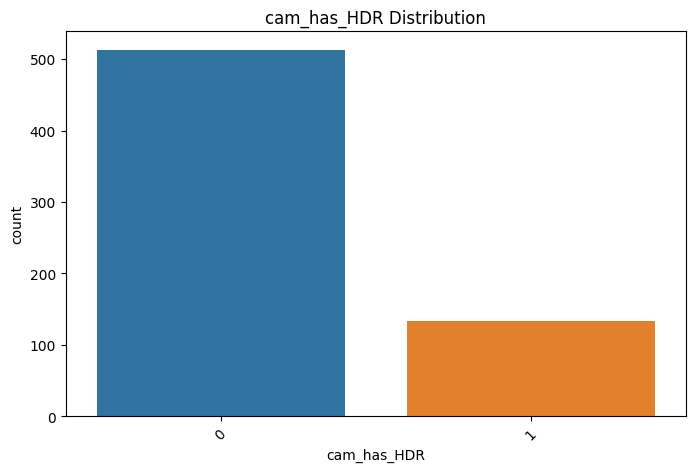

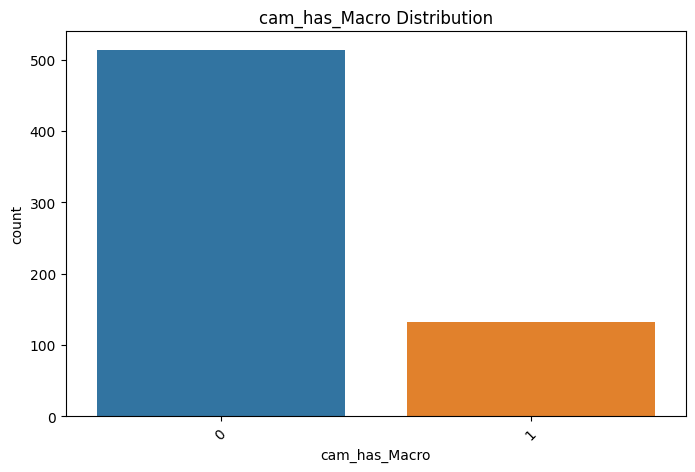

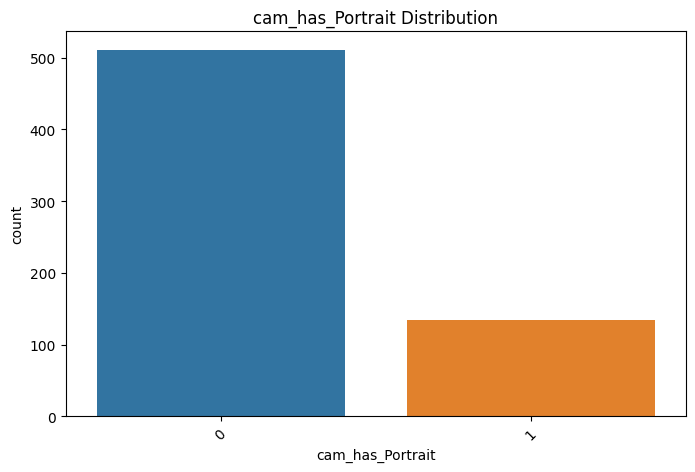

In [26]:

# Set the folder location to save the PNG files
folder_location = "F:/an-001-master/phones/src/plots/categoryfeatureanalysis"

# Create the folder if it doesn't exist
if not os.path.exists(folder_location):
    os.makedirs(folder_location)

# Categorical Feature Analysis
print("\nCategorical Feature Analysis:")
categorical_features = ["battery_type", "form_factor", "os_name", "cam_has_AI", "cam_has_OIS", "cam_has_Zoom", "cam_has_HDR", "cam_has_Macro", "cam_has_Portrait"]
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=feature)
    plt.title(f"{feature} Distribution")
    plt.xticks(rotation=45)

    # Save the plot as a PNG file in the specified folder
    file_path = os.path.join(folder_location, f"{feature}_distribution.png")
    plt.savefig(file_path)

    # Show the plot
    plt.show()



Feature Importance:


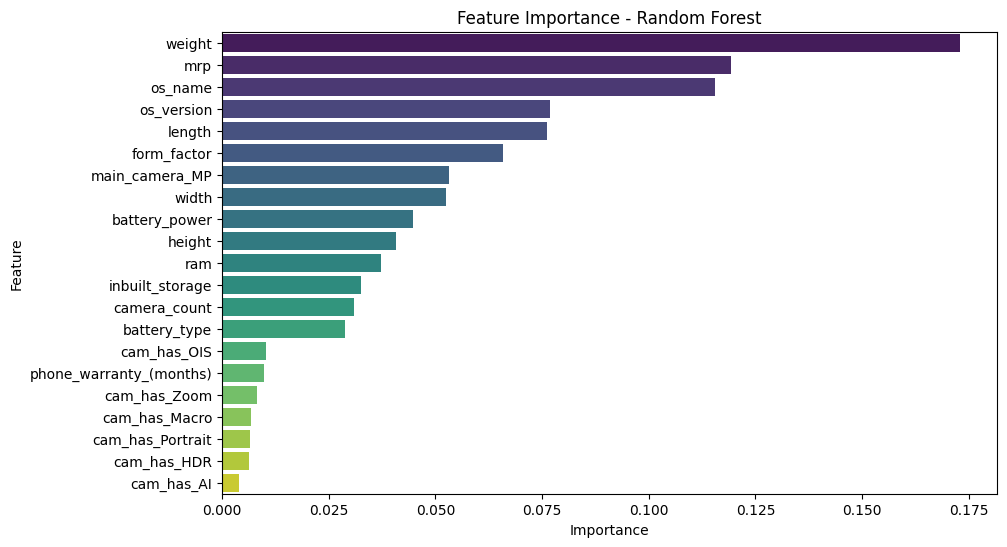

In [15]:
# Feature Importance using Random Forest
print("\nFeature Importance:")
X = df.drop(columns=["is_success"])
y = df["is_success"]
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)
importance_df = pd.DataFrame({"Feature": X.columns, "Importance": rf_model.feature_importances_})
importance_df = importance_df.sort_values(by="Importance", ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x="Importance", y="Feature", palette="viridis")
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

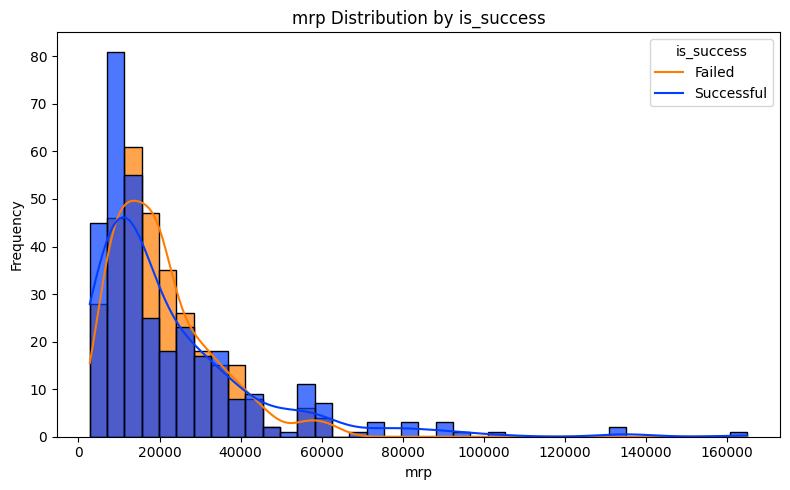

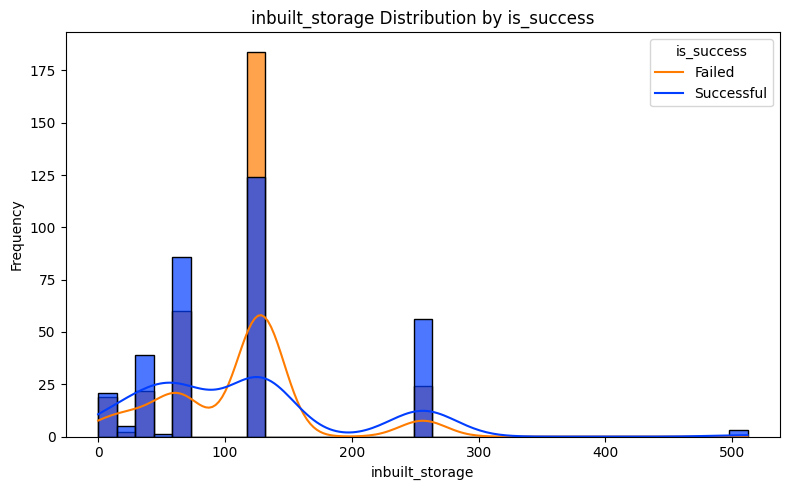

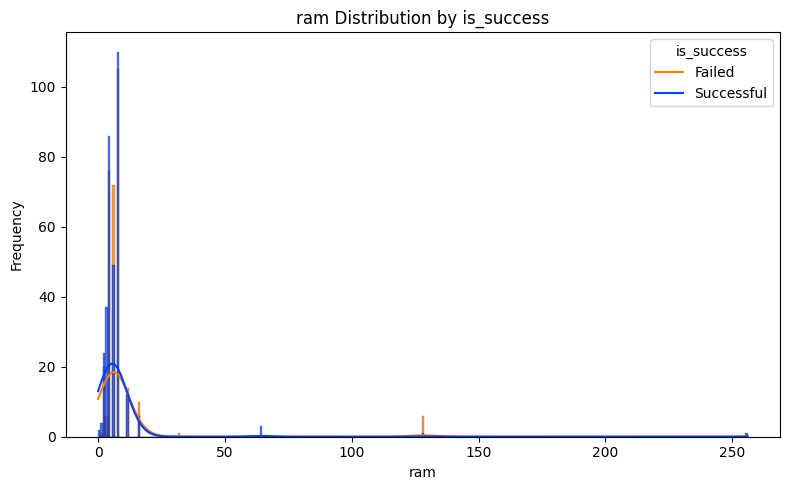

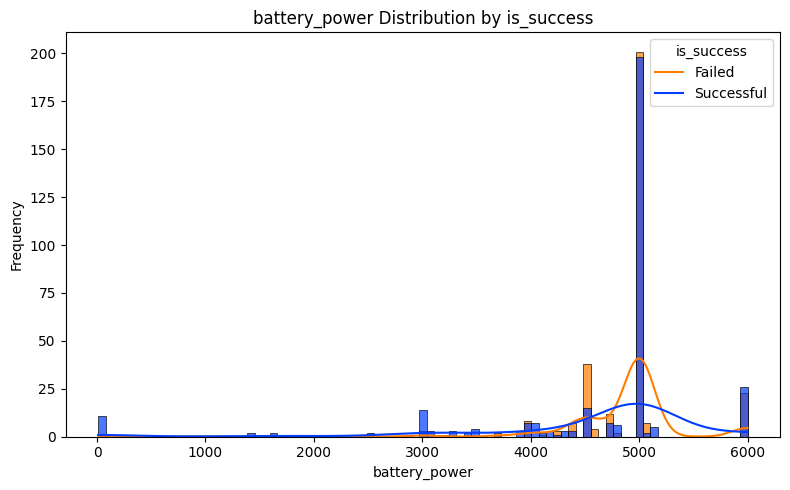

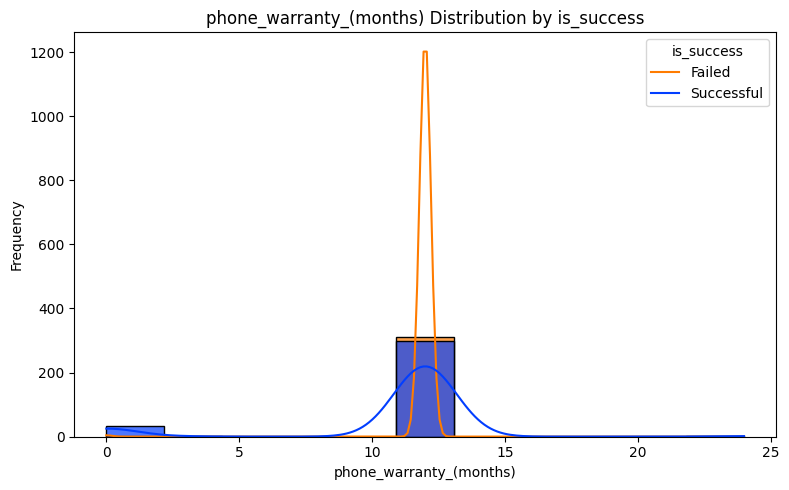

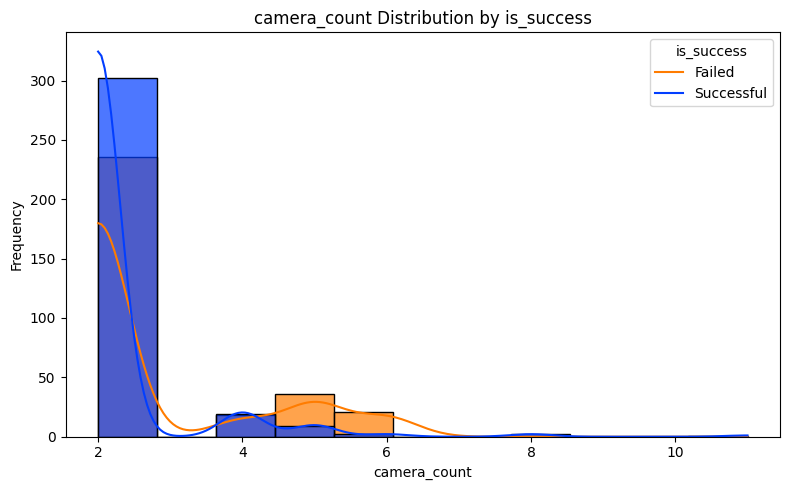

In [30]:


# Set the folder location to save the PNG files
folder_location = "F:/an-001-master/phones/src/plots/successvsfeatures"

# Create the folder if it doesn't exist
if not os.path.exists(folder_location):
    os.makedirs(folder_location)

# Histogram for each numeric feature with respect to "is_success"
for feature in numeric_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=feature, hue="is_success", kde=True, alpha=0.7, palette="bright")
    plt.title(f"{feature} Distribution by is_success")
    plt.legend(title="is_success", labels=["Failed", "Successful"])
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.tight_layout()
    
    # Save the plot as PNG in the specified folder location
    plt.savefig(os.path.join(folder_location, f"{feature}_histogram.png"))
    plt.show()


f:\an-001-master\venv\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 11.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
f:\an-001-master\venv\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
f:\an-001-master\venv\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 23.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
f:\an-001-master\venv\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 28.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


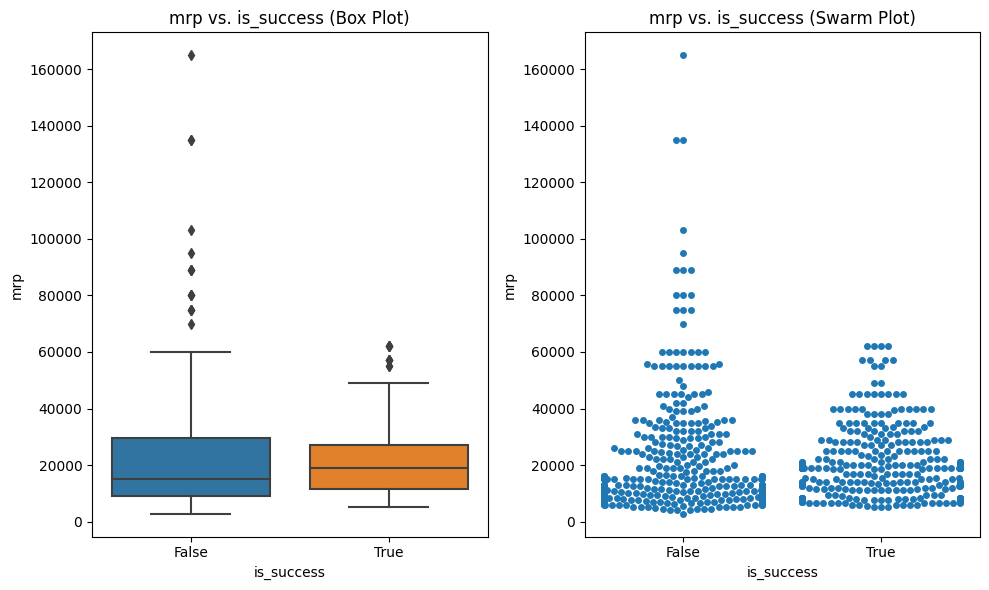

f:\an-001-master\venv\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 49.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
f:\an-001-master\venv\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 55.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
f:\an-001-master\venv\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 63.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
f:\an-001-master\venv\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 64.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


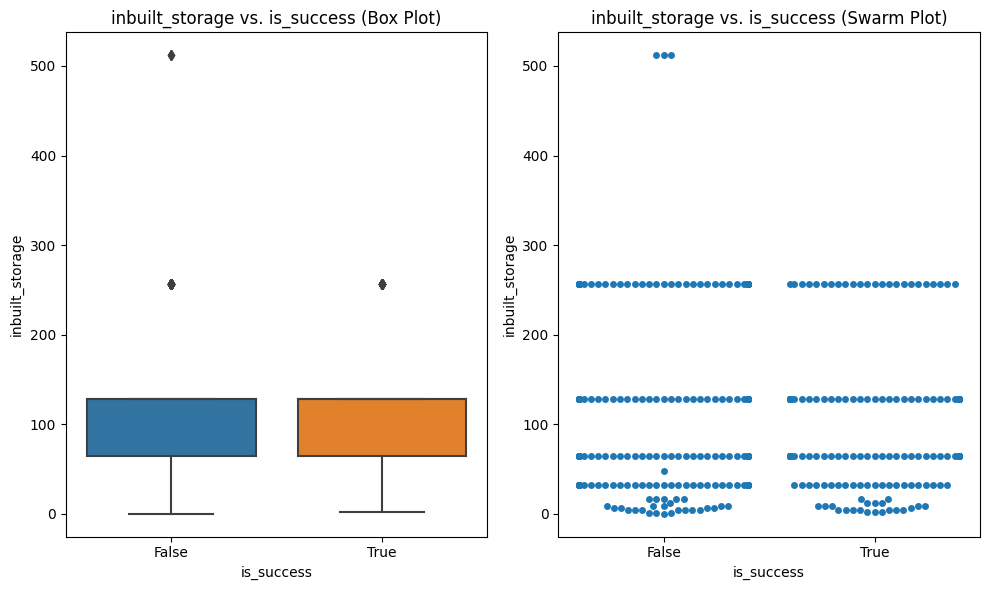

f:\an-001-master\venv\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 71.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
f:\an-001-master\venv\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 67.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
f:\an-001-master\venv\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 78.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
f:\an-001-master\venv\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 75.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


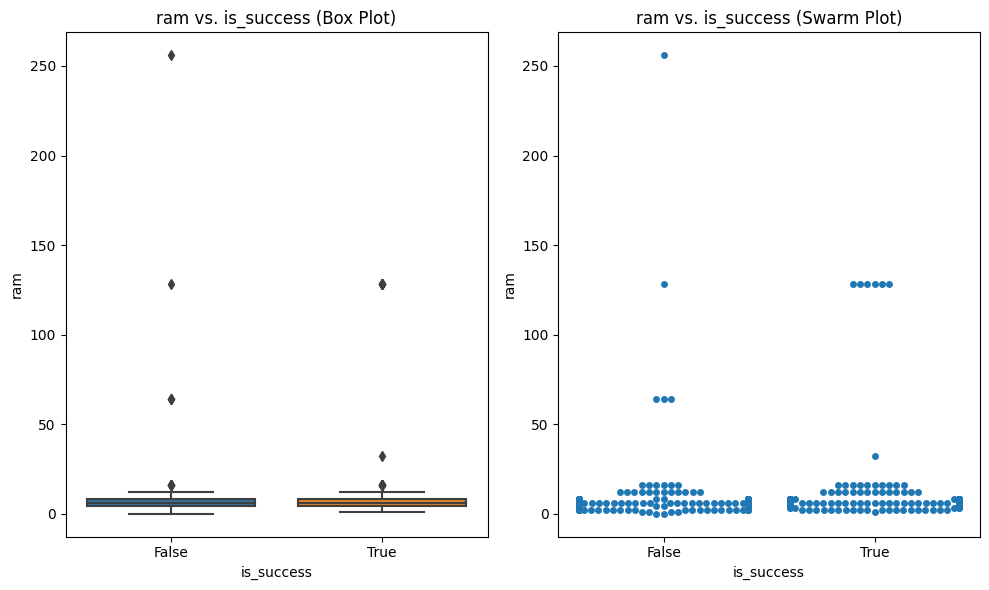

f:\an-001-master\venv\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 49.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
f:\an-001-master\venv\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 56.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
f:\an-001-master\venv\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 53.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
f:\an-001-master\venv\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 64.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


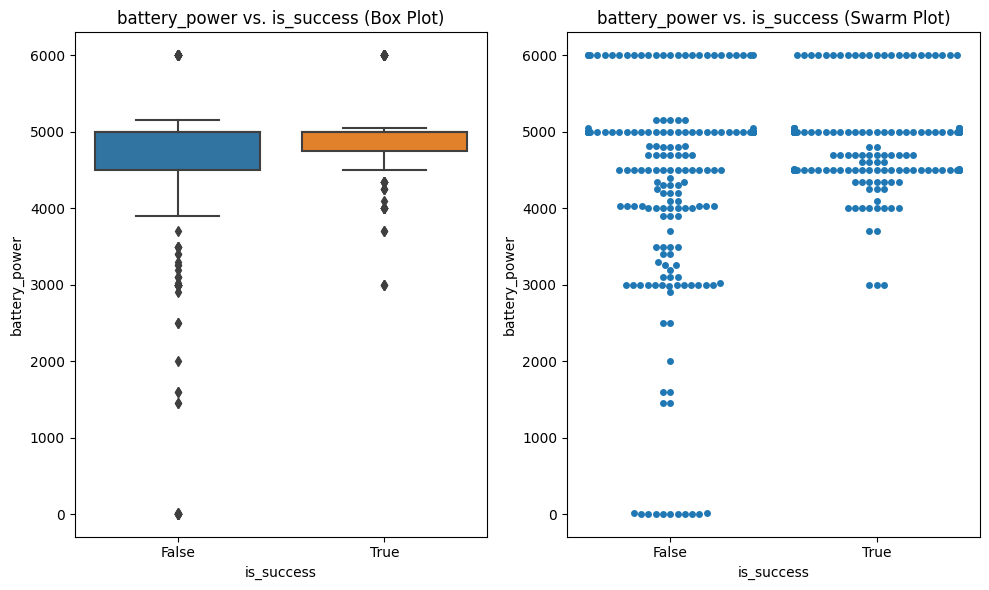

f:\an-001-master\venv\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 78.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
f:\an-001-master\venv\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 88.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
f:\an-001-master\venv\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 85.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
f:\an-001-master\venv\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 92.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


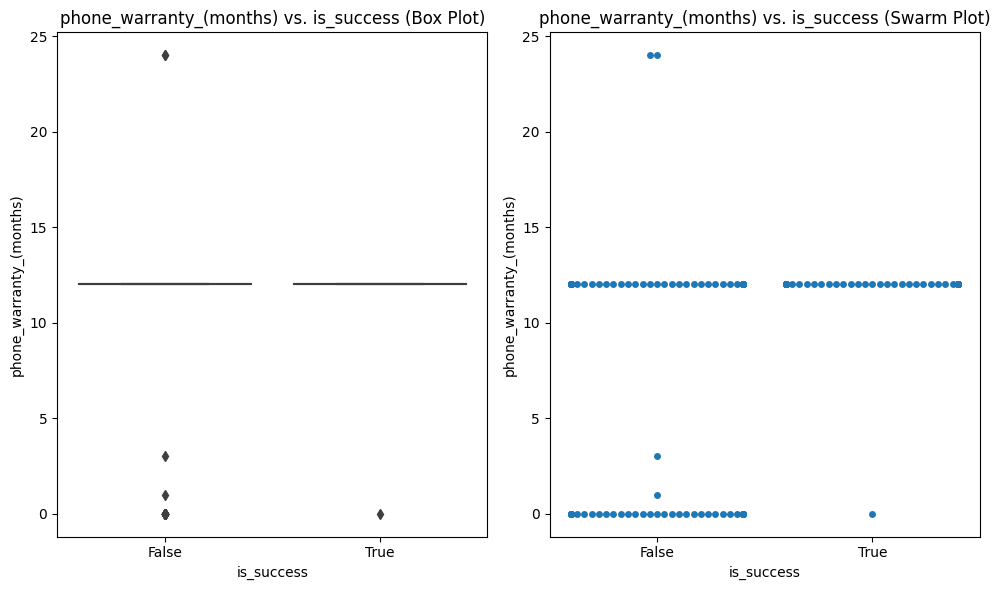

f:\an-001-master\venv\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 79.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
f:\an-001-master\venv\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 65.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
f:\an-001-master\venv\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 83.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
f:\an-001-master\venv\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 72.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


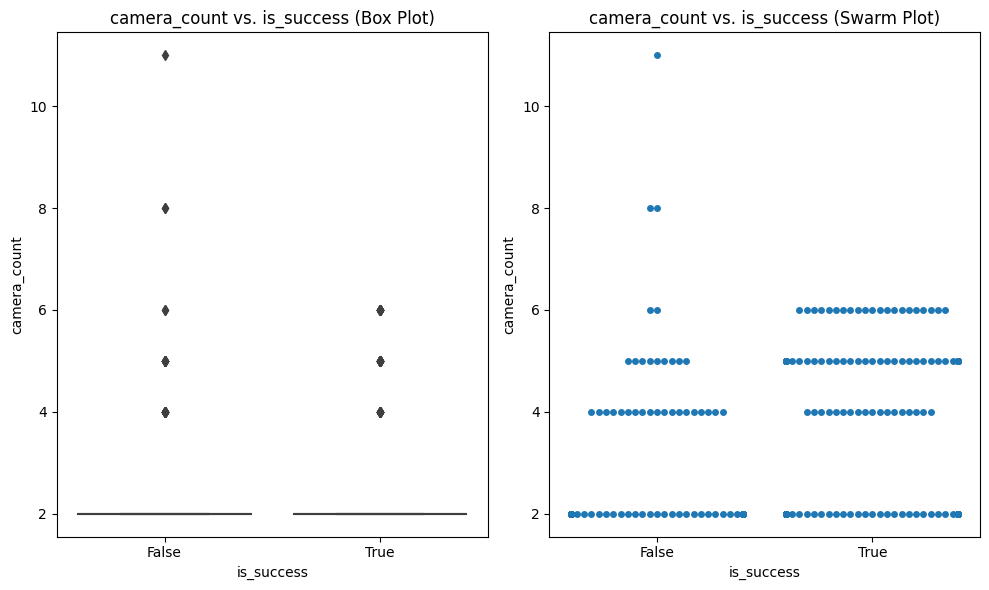

In [31]:
import os

# Set the folder location to save the PNG files
folder_location = "F:/an-001-master/phones/src/plots/successvsfeatures/boxplot"

# Create the folder if it doesn't exist
if not os.path.exists(folder_location):
    os.makedirs(folder_location)

# Success vs. Features (Comparison between successful and failed phones)
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    
    # Box Plot
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, x="is_success", y=feature)
    plt.title(f"{feature} vs. is_success (Box Plot)")

    # Swarm Plot
    plt.subplot(1, 2, 2)
    sns.swarmplot(data=df, x="is_success", y=feature)
    plt.title(f"{feature} vs. is_success (Swarm Plot)")

    plt.tight_layout()
    
    # Save the plot as PNG in the specified folder location
    plt.savefig(os.path.join(folder_location, f"{feature}_success_vs_features.png"))
    plt.show()



Correlation with Success:
is_success                 1.000000
os_name                    0.374833
main_camera_MP             0.274484
phone_warranty_(months)    0.200570
camera_count               0.190139
battery_power              0.187325
os_version                 0.182190
cam_has_Macro              0.149460
cam_has_Zoom               0.145354
cam_has_HDR                0.145354
cam_has_OIS                0.141273
cam_has_AI                 0.137218
cam_has_Portrait           0.137218
ram                        0.042841
height                     0.035445
battery_type               0.014646
inbuilt_storage           -0.034399
length                    -0.051242
width                     -0.057825
form_factor               -0.063842
mrp                       -0.064370
weight                    -0.270975
Name: is_success, dtype: float64


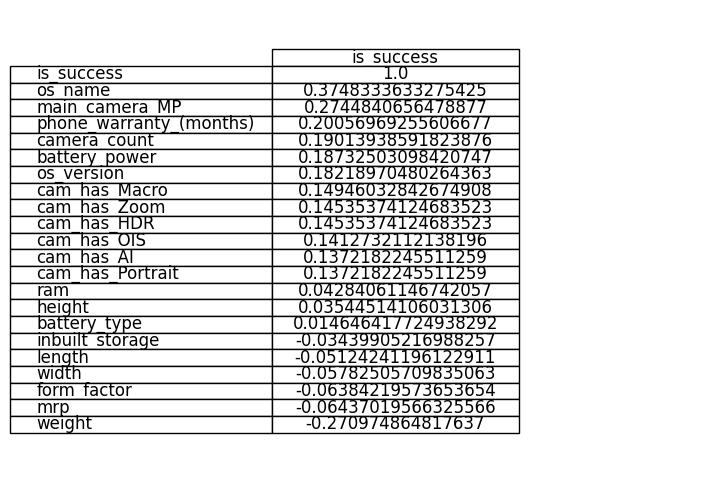

In [43]:
import matplotlib.pyplot as plt

# Correlation with Success
print("\nCorrelation with Success:")
correlation_with_success = df.corr()["is_success"].sort_values(ascending=False)
print(correlation_with_success)

# Convert correlation_with_success to a DataFrame for visualization
correlation_df = correlation_with_success.to_frame()

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Hide axes
ax.axis("off")

# Create a table using plt.table
table = ax.table(cellText=correlation_df.values,
                 rowLabels=correlation_df.index,
                 colLabels=correlation_df.columns,
                 cellLoc="center",
                 loc="center")

# Set the table properties
table.auto_set_font_size(False)
table.set_fontsize(12)

# Adjust table size based on values
table.auto_set_column_width([0, 1])

# Save the figure as PNG in the specified location
folder_location = "F:/an-001-master/phones/src/plots/correlationwithsuccess/"
file_path = os.path.join(folder_location, "correlation_with_success.png")
plt.savefig(file_path, bbox_inches="tight", pad_inches=0.5)

# Show the table
plt.show()



Success Rate by Category:


C:\Users\somar\AppData\Local\Temp\ipykernel_22848\2429291662.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=feature, y="is_success", ci=None)


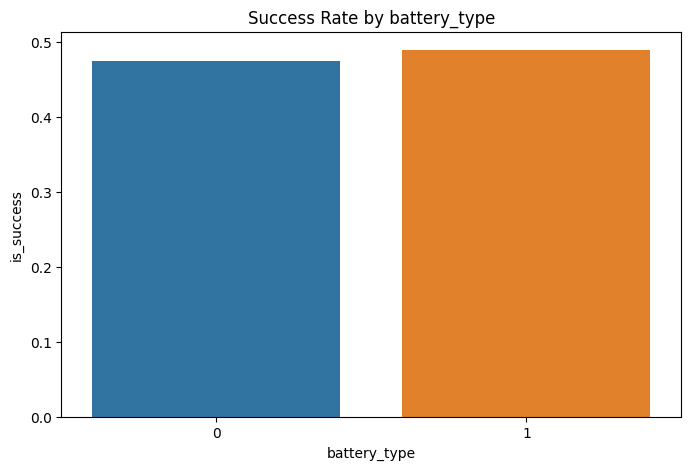

C:\Users\somar\AppData\Local\Temp\ipykernel_22848\2429291662.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=feature, y="is_success", ci=None)


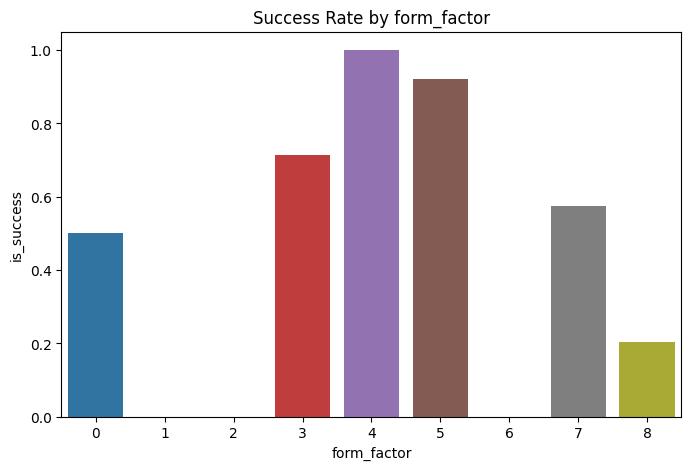

C:\Users\somar\AppData\Local\Temp\ipykernel_22848\2429291662.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=feature, y="is_success", ci=None)


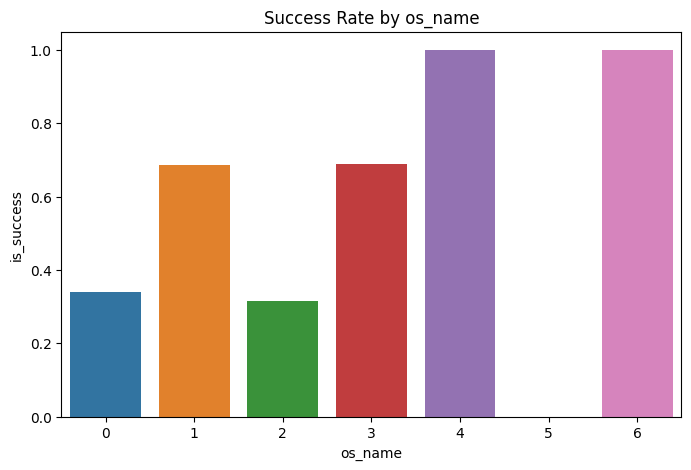

C:\Users\somar\AppData\Local\Temp\ipykernel_22848\2429291662.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=feature, y="is_success", ci=None)


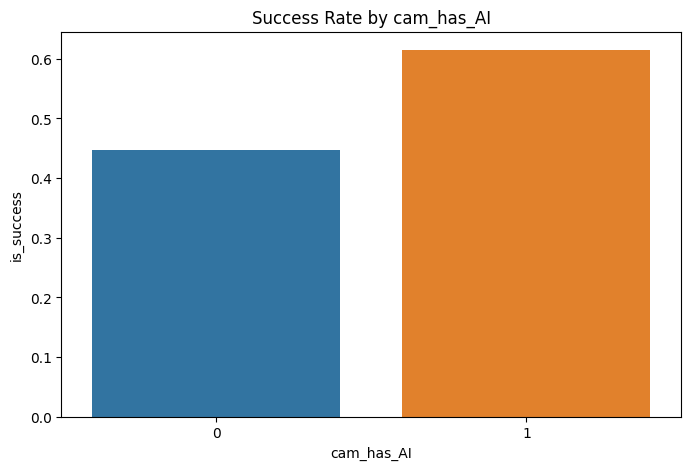

C:\Users\somar\AppData\Local\Temp\ipykernel_22848\2429291662.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=feature, y="is_success", ci=None)


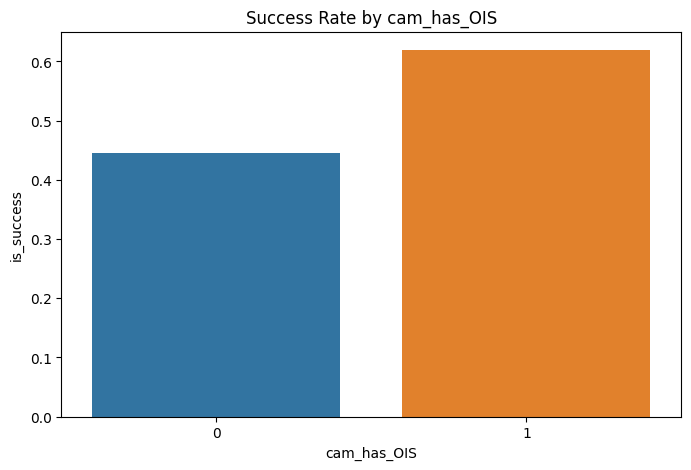

C:\Users\somar\AppData\Local\Temp\ipykernel_22848\2429291662.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=feature, y="is_success", ci=None)


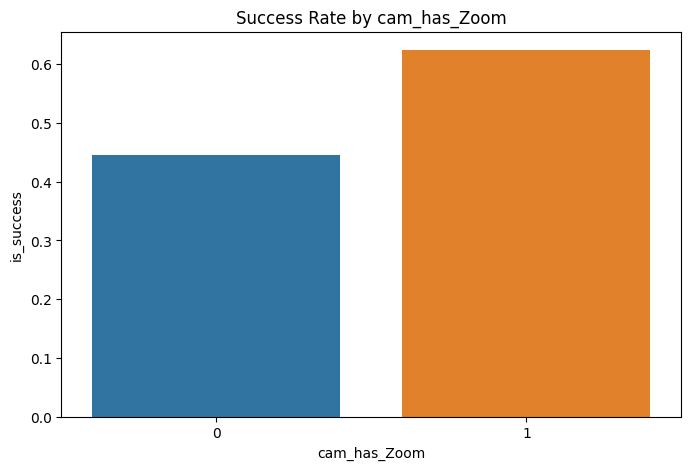

C:\Users\somar\AppData\Local\Temp\ipykernel_22848\2429291662.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=feature, y="is_success", ci=None)


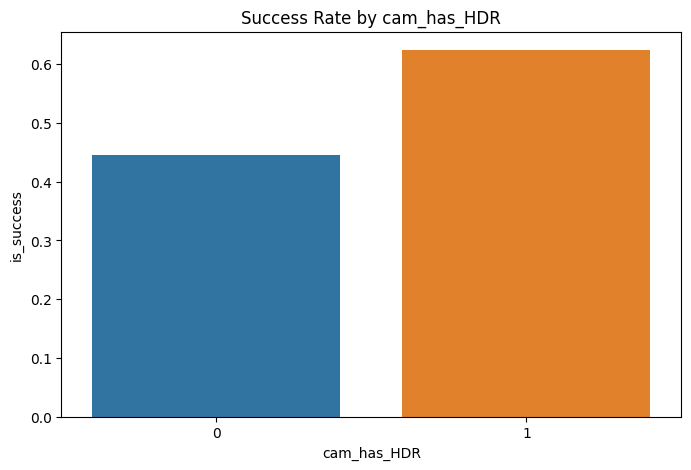

C:\Users\somar\AppData\Local\Temp\ipykernel_22848\2429291662.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=feature, y="is_success", ci=None)


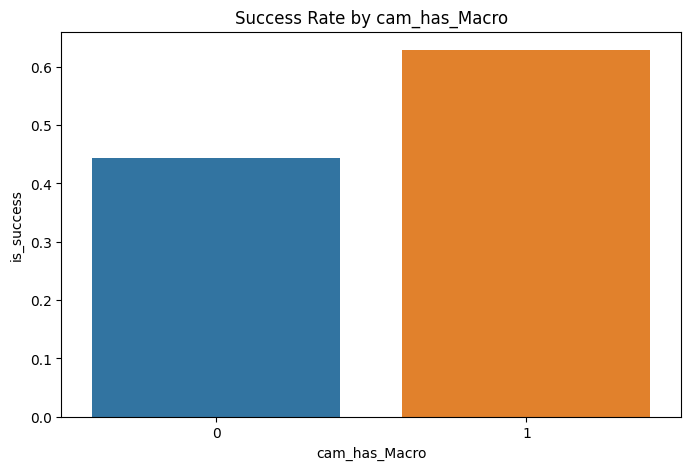

C:\Users\somar\AppData\Local\Temp\ipykernel_22848\2429291662.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=feature, y="is_success", ci=None)


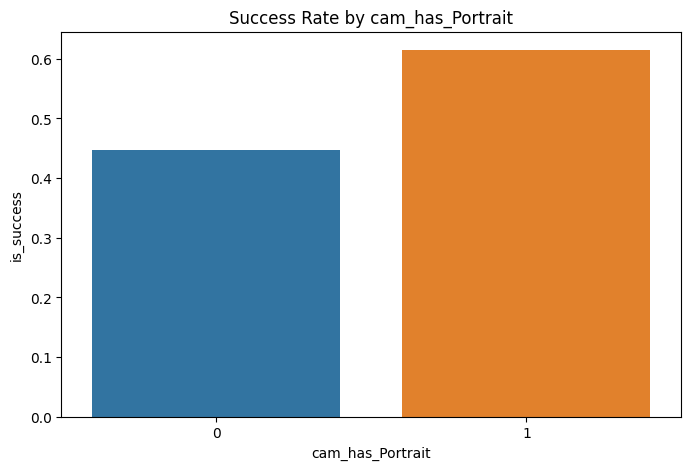

In [44]:
# Success Rate by Category
print("\nSuccess Rate by Category:")
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.barplot(data=df, x=feature, y="is_success", ci=None)
    plt.title(f"Success Rate by {feature}")

    # Save the figure as PNG in the specified location
    folder_location = "F:/an-001-master/phones/src/plots/successratebycategory"
    file_name = f"success_rate_by_{feature}.png"
    file_path = os.path.join(folder_location, file_name)
    plt.savefig(file_path, bbox_inches="tight", pad_inches=0.5)

    plt.show() 


In [19]:
# Correlation with Success
print("\nCorrelation with Success:")
correlation_with_success = df.corr()["is_success"].sort_values(ascending=False)
correlation_table = pd.DataFrame({"Correlation with Success": correlation_with_success})
print(correlation_table)


Correlation with Success:
                         Correlation with Success
is_success                               1.000000
os_name                                  0.374833
main_camera_MP                           0.274484
phone_warranty_(months)                  0.200570
camera_count                             0.190139
battery_power                            0.187325
os_version                               0.182190
cam_has_Macro                            0.149460
cam_has_Zoom                             0.145354
cam_has_HDR                              0.145354
cam_has_OIS                              0.141273
cam_has_AI                               0.137218
cam_has_Portrait                         0.137218
ram                                      0.042841
height                                   0.035445
battery_type                             0.014646
inbuilt_storage                         -0.034399
length                                  -0.051242
width                  